In [1]:
!unzip -q dataandlib.zip

Archive:  lib.zip
   creating: lib/
  inflating: lib/__init__.py         
  inflating: lib/html.py             
  inflating: lib/metrics.py          
  inflating: lib/show.py             
  inflating: lib/utils.py            
Archive:  data.zip
   creating: data/
   creating: data/valid_mask/
  inflating: data/valid_mask/1325.png  
  inflating: data/valid_mask/1335.png  
  inflating: data/valid_mask/1328.png  
  inflating: data/valid_mask/1341.png  
  inflating: data/valid_mask/1383.png  
  inflating: data/valid_mask/1428.png  
  inflating: data/valid_mask/1439.png  
  inflating: data/valid_mask/1414.png  
  inflating: data/valid_mask/1322.png  
  inflating: data/valid_mask/1317.png  
  inflating: data/valid_mask/1412.png  
  inflating: data/valid_mask/1433.png  
  inflating: data/valid_mask/1319.png  
  inflating: data/valid_mask/1376.png  
  inflating: data/valid_mask/1431.png  
  inflating: data/valid_mask/1340.png  
  inflating: data/valid_mask/1417.png  
  inflating: data/valid_ma

In [8]:
#!git clone https://github.com/Sashmark97/InternshipTestTask.git

Cloning into 'InternshipTestTask'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 8), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [0]:
import sys
path_c = ""
colab = True
if (colab):
  path_c = "/content/"
sys.path.append('/content/lib')
import metrics, html, show, utils, __init__

In [0]:
import os
os.chdir("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

#from lib import metrics

%matplotlib inline

# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

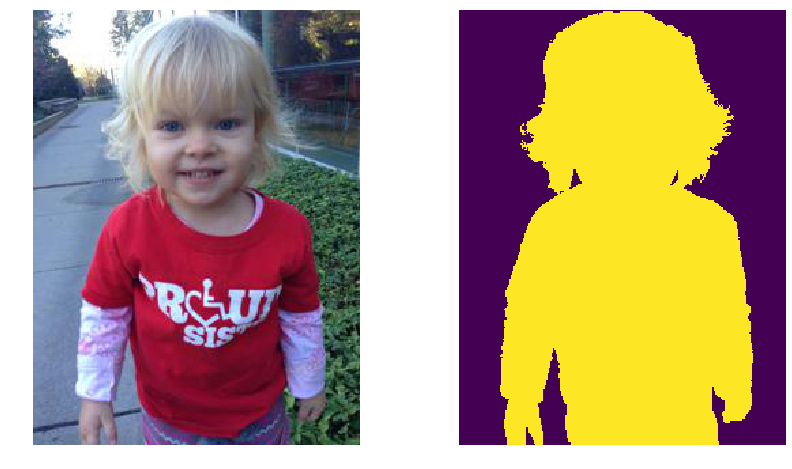

In [32]:
path = path_c + "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show.show_img_with_mask(img, mask)

Пример подсчета метрики:

In [25]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
metrics.get_dice(mask, random_mask)

0.49577553346170405

Можно для последовательности масок вычислить среднее значение метрики:

In [26]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
metrics.get_dice(random_masks_1, random_masks_2)

0.5000129794473732

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [27]:
rle_mask = utils.encode_rle(mask)
rle_mask

'13794 1 14032 4 14037 1 14046 1 14269 1 14272 4 14277 2 14282 5 14288 1 14505 3 14509 11 14522 5 14528 3 14535 1 14745 1 14747 13 14761 10 14775 2 14985 1 14988 31 15020 2 15223 39 15264 2 15456 55 15695 57 15934 61 16173 64 16411 67 16647 72 16886 1 16888 69 16959 2 17126 71 17198 3 17202 1 17364 77 17442 1 17602 82 17843 83 18082 84 18320 85 18559 89 18799 90 19039 90 19278 91 19516 1 19519 91 19757 91 19850 1 19996 96 20234 1 20236 95 20473 100 20713 99 20955 99 21194 99 21433 96 21530 1 21673 98 21912 100 22013 2 22151 103 22391 103 22629 103 22733 2 22870 104 22975 1 23109 105 23350 106 23590 106 23831 102 23934 2 24070 105 24309 107 24549 107 24789 107 25030 105 25269 108 25508 109 25748 105 25854 1 25989 107 26229 107 26471 104 26710 105 26950 105 27190 105 27430 106 27670 105 27910 104 28152 101 28392 102 28632 100 28872 100 29113 99 29353 99 29593 99 29833 98 30073 99 30313 99 30554 96 30794 96 31034 96 31274 95 31514 96 31755 94 31994 94 32234 94 32474 93 32713 94 32953 95 3

Теперь восстановим маску:

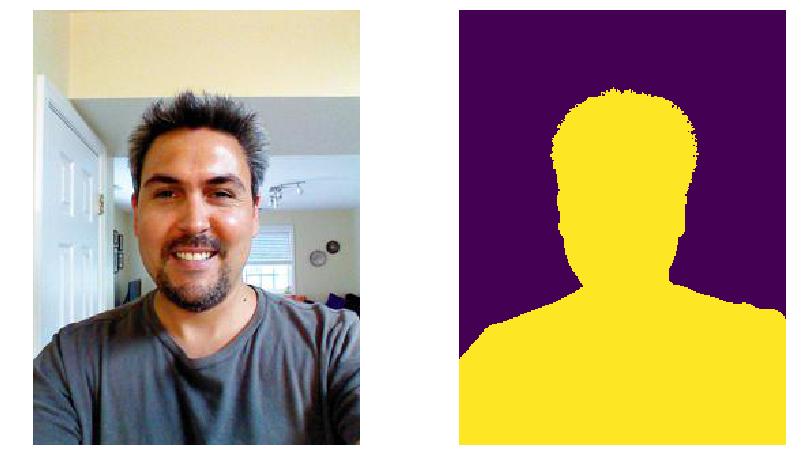

In [28]:
decoded_mask = utils.decode_rle(rle_mask)
show.show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [33]:
pred = pd.read_csv(path_c + "data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


In [0]:
import os
import numpy as np

from glob import glob
from PIL import Image
from datetime import datetime

def generate_html(path_to_data):
    """Generates content of html file and saves it.

    Parameters
    ----------
    path_to_data : str
        Path to data with original images, predicted masks, and cropped according masks images.

    Returns
    -------
    str
        Content of html file.

    """
    html = "\n".join(["<!doctype html>", "<html>", "<head>",
                      "<meta http-equiv='Content-Type' content='text/html; charset=utf-8'>",
                      "<title>Визуализация результатов</title>", "</head>", "<body>",
                      "<table cellspacing='0' cellpadding='5'>"]) + "\n"
    paths_to_imgs = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_img.jpg")])
    paths_to_masks = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_pred_mask.png")])
    paths_to_crops = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_crop.png")])
    for ind, (path_to_img, path_to_mask, path_to_crop) in enumerate(zip(paths_to_imgs,
                                                                        paths_to_masks,
                                                                        paths_to_crops)):
        if not ind % 2:
            html += "<tr>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_img}'"
        html += "alt='Something went wrong.'"
        html += f"height='320' title='Original image:\n{path_to_img}'></td>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_mask}'"
        html += "alt='Something went wrong.'"
        html += "height='320' title='Predicted mask'></td>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_crop}'"
        html += "alt='Something went wrong.'"
        html += "height='320' title='Cropped img according\npredicted mask'></td>\n"
        if not ind % 2:
            html += "<td width='100'></td>\n"
        else:
            html += "</tr>\n"
    date = datetime.today().strftime("%Y-%m-%d-%H.%M.%S")
    html += f"</table>\n<i>The page was generated at {date}</i></body>\n</html>"
    filename = os.path.basename(path_to_data) + ".html"
    path_to_save = os.path.dirname(path_to_data)
    with open(f"{path_to_save}/{filename}", "w") as f:
        f.write(html)

    return html

def get_html(paths_to_imgs, pred_masks, path_to_save="results/test"):
    """Generates html file and saves it.

    Parameters
    ----------
    paths_to_imgs : list[str]
        List of paths to original images.
    pred_masks : list[np.ndarray]
        Predicted masks.
    path_to_save : str
        Path to save source images to put them in html file. Html name is the same as name of the
        last folder on `path_to_save` and is saved on upper level.

    Returns
    -------
    str
        Content of html file.

    """
    paths_to_imgs = np.array(paths_to_imgs)
    pred_masks = np.array(pred_masks)

    if not os.path.exists(path_to_save):
        os.makedirs(path_to_save)

    order = np.argsort(paths_to_imgs)
    paths_to_imgs = paths_to_imgs[order]
    pred_masks = pred_masks[order]

    for path_to_img, pred_mask in zip(paths_to_imgs, pred_masks):
        img_id = path_to_img.split("/")[-1].split(".")[0]
        img = np.array(Image.open(path_to_img))
        Image.fromarray(img).save(f"{path_to_save}/{img_id}_img.jpg")
        Image.fromarray(pred_mask).save(f"{path_to_save}/{img_id}_pred_mask.png")
        crop_img = img.copy()
        crop_img[pred_mask == 0] = 0
        Image.fromarray(crop_img).save(f"{path_to_save}/{img_id}_crop.png")

    html = generate_html(path_to_save)

    return html

Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [0]:
paths_to_imgs = sorted(glob(path_c + "data/valid/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob(path_c + "data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save= path_c + "results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.

In [0]:
!zip -rq res.zip /content/results